In [1]:
import os
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

# Parameters
datasetLocation = './dataset'  
num_samples_per_class = 1000
image_size = (28, 28)  

data = []
labels = []

classes = [str(i) for i in range(10)]  

for cls in classes:
    class_dir = os.path.join(datasetLocation, cls)
    all_images = os.listdir(class_dir)
    
    if len(all_images) < num_samples_per_class:
        raise ValueError(f"Not enough images in class {cls}")
    
    sampled_images = random.sample(all_images, num_samples_per_class)
    
    for img_name in sampled_images:
        img_path = os.path.join(class_dir, img_name)
        
        # Open the image file
        with Image.open(img_path) as img:
            # grayscale
            img = img.convert('L')
            
            img = img.resize(image_size, Image.LANCZOS)
            
            img_array = np.array(img, dtype=np.uint8)
            
            # Normalization
            img_array = img_array / 255  
            
            img_array = img_array.flatten()
            
            data.append(img_array)
            labels.append(int(cls))

data = np.array(data)
labels = np.array(labels)

data, labels = shuffle(data, labels, random_state=42)

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (8000, 784)
Training labels shape: (8000,)
Testing data shape: (2000, 784)
Testing labels shape: (2000,)


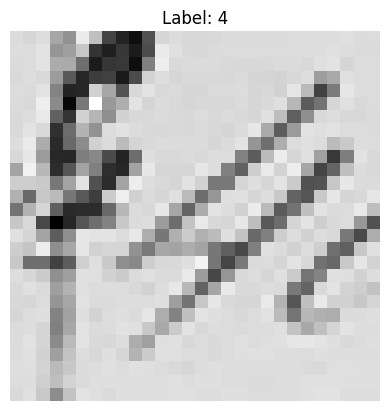

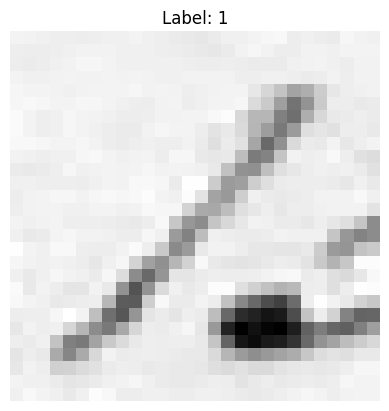

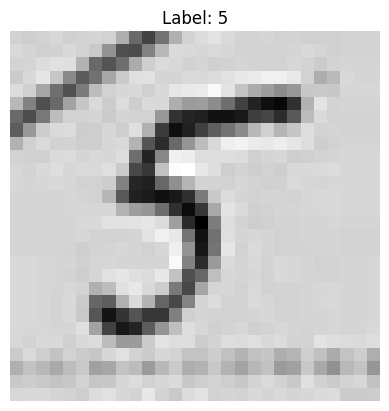

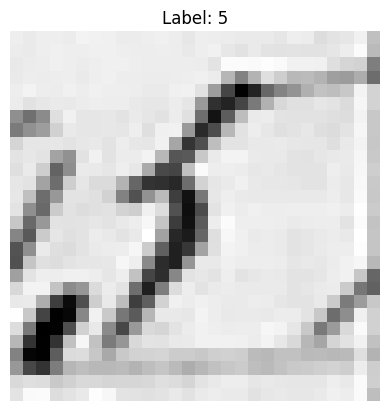

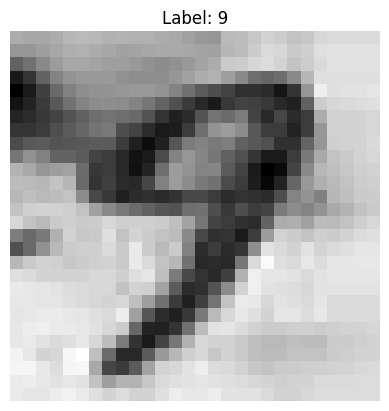

In [2]:
#  display images
def show_image(img_array, label):
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Show a few samples from the training set
for i in range(5):
    show_image(X_train[i], y_train[i])


Cross-Validation Results (Naive Bayes):
Accuracy: 0.5119 ± 0.0094
Precision: 0.5476 ± 0.0102
Recall: 0.5119 ± 0.0094
F1-score: 0.5156 ± 0.0095

Test Set Performance (Naive Bayes):
Accuracy: 0.5250
Precision: 0.5547
Recall: 0.5250
F1-score: 0.5261

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       200
           1       0.34      0.71      0.46       200
           2       0.60      0.40      0.48       200
           3       0.55      0.67      0.60       200
           4       0.52      0.42      0.46       200
           5       0.60      0.36      0.45       200
           6       0.68      0.58      0.63       200
           7       0.63      0.51      0.56       200
           8       0.44      0.45      0.45       200
           9       0.60      0.53      0.56       200

    accuracy                           0.53      2000
   macro avg       0.55      0.53      0.53      2000
weighted a

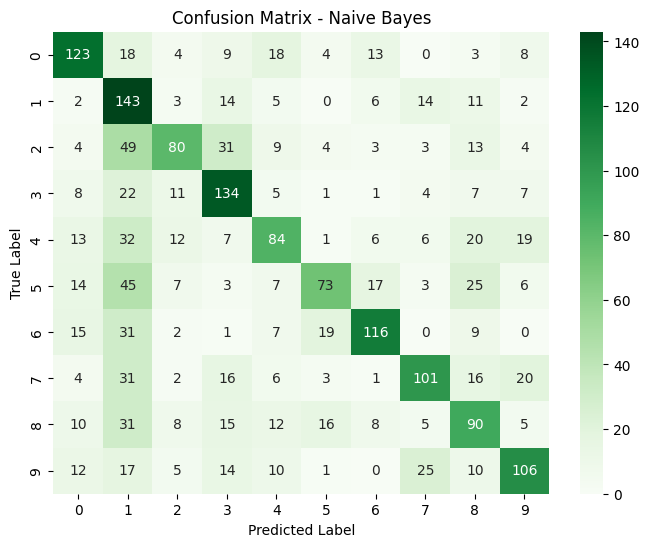

In [5]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_accuracy_scores = []
nb_precision_scores = []
nb_recall_scores = []
nb_f1_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]
    
    nb_model.fit(X_cv_train, y_cv_train)
    
    # Predict on validation set
    y_pred = nb_model.predict(X_cv_val)
    
    # Calculate metrics
    nb_accuracy_scores.append(accuracy_score(y_cv_val, y_pred))
    nb_precision_scores.append(precision_score(y_cv_val, y_pred, average='macro', zero_division=0))
    nb_recall_scores.append(recall_score(y_cv_val, y_pred, average='macro', zero_division=0))
    nb_f1_scores.append(f1_score(y_cv_val, y_pred, average='macro', zero_division=0))

print("\nCross-Validation Results (Naive Bayes):")
print(f"Accuracy: {np.mean(nb_accuracy_scores):.4f} ± {np.std(nb_accuracy_scores):.4f}")
print(f"Precision: {np.mean(nb_precision_scores):.4f} ± {np.std(nb_precision_scores):.4f}")
print(f"Recall: {np.mean(nb_recall_scores):.4f} ± {np.std(nb_recall_scores):.4f}")
print(f"F1-score: {np.mean(nb_f1_scores):.4f} ± {np.std(nb_f1_scores):.4f}")

# Fit the model on the entire training set
nb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_nb = nb_model.predict(X_test)

# Calculate performance metrics on test set
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb, average='macro', zero_division=0)
test_recall_nb = recall_score(y_test, y_test_pred_nb, average='macro', zero_division=0)
test_f1_nb = f1_score(y_test, y_test_pred_nb, average='macro', zero_division=0)
test_confusion_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

print("\nTest Set Performance (Naive Bayes):")
print(f"Accuracy: {test_accuracy_nb:.4f}")
print(f"Precision: {test_precision_nb:.4f}")
print(f"Recall: {test_recall_nb:.4f}")
print(f"F1-score: {test_f1_nb:.4f}")

print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb, zero_division=0))

plt.figure(figsize=(8,6))
sns.heatmap(test_confusion_matrix_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()